In [1]:
%load_ext autoreload
%autoreload 2

import sys
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

sys.path.append('/content/drive/MyDrive/Colab Notebooks/')
import explore

data_path = "/content/drive/MyDrive/CAFO_data/forTraining/interim_files/"

Mounted at /content/drive


In [3]:
datasets = ["Iowa", "Chile", "Romania", "Mexico"]

df_list = []
for dataset in datasets:
  df_list.append(pd.read_pickle(f"{data_path}{dataset}_bldgs.pkl"))

df = pd.concat(df_list, ignore_index=True)

bins = explore.define_bins()

In [4]:
for_stats = df[(df["Dataset name"] == "Iowa") & (df["Farm type"] == "Pig")]
for_stats = for_stats[for_stats["Number of animals"] >= 2500]
threshold = for_stats["Area (sq m)"].quantile(0.1)
print(f"Iowa large pig CAFO 10%-ile building area = {threshold:.0f} sq m \n")

Iowa large pig CAFO 10%-ile building area = 802 sq m 



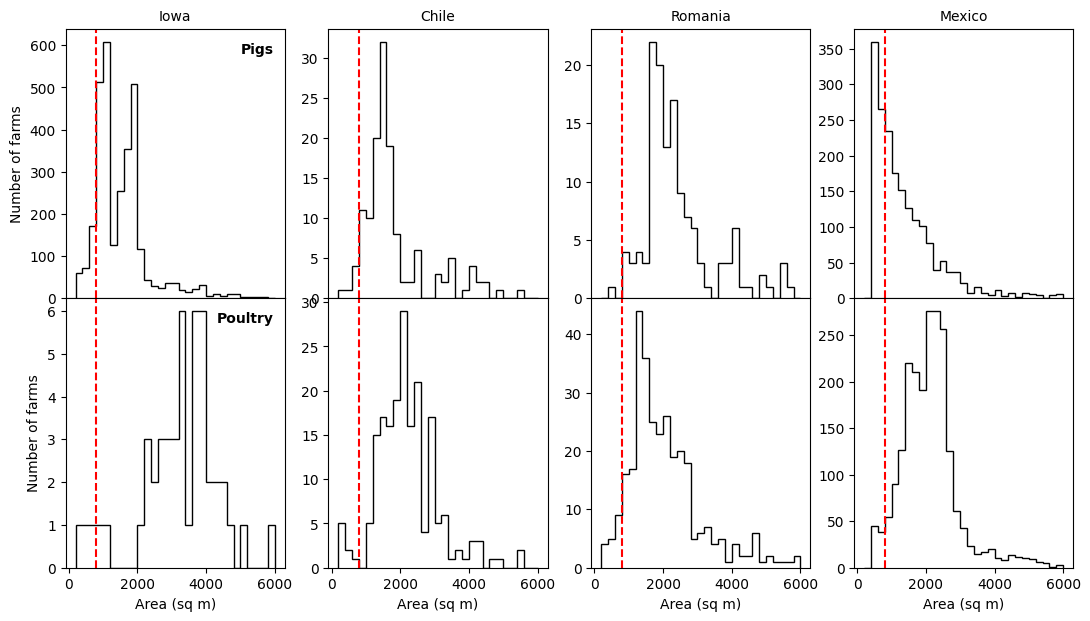

In [5]:
# Histograms

_, (ax0, ax1) = plt.subplots(2, 4, figsize=(13, 7))

def make_the_plot(df, label):
  ax.hist(df["Area (sq m)"], bins=bins["Area (sq m)"], histtype="step",\
          color='k', label=label)
  ax.axvline(threshold, ls='--', color='r')
  if df["Dataset name"].unique() == "Iowa":
    ax.text(0.95, 0.95, label, ha='right', va='top', transform=ax.transAxes,\
            fontsize=10, weight='bold')
    ax.set_ylabel("Number of farms")

# Pigs
for dataset, ax in zip(datasets, ax0):
  to_plot = df[(df["Dataset name"] == dataset) & (df["Farm type"] == "Pig")]
  make_the_plot(to_plot, "Pigs")
  ax.get_xaxis().set_ticks([])
  ax.set_title(dataset, fontsize=10)

# Poultry
for dataset, ax in zip(datasets, ax1):
  to_plot = df[(df["Dataset name"] == dataset) & (df["Farm type"].isin(["Poultry", "Broiler", "Layer"]))]
  make_the_plot(to_plot, "Poultry")
  ax.set_xlabel("Area (sq m)")

plt.subplots_adjust(hspace=0, wspace=0.2)
plt.savefig("/content/drive/MyDrive/CAFO_data/Analysis/compare_histos.png", dpi=450)

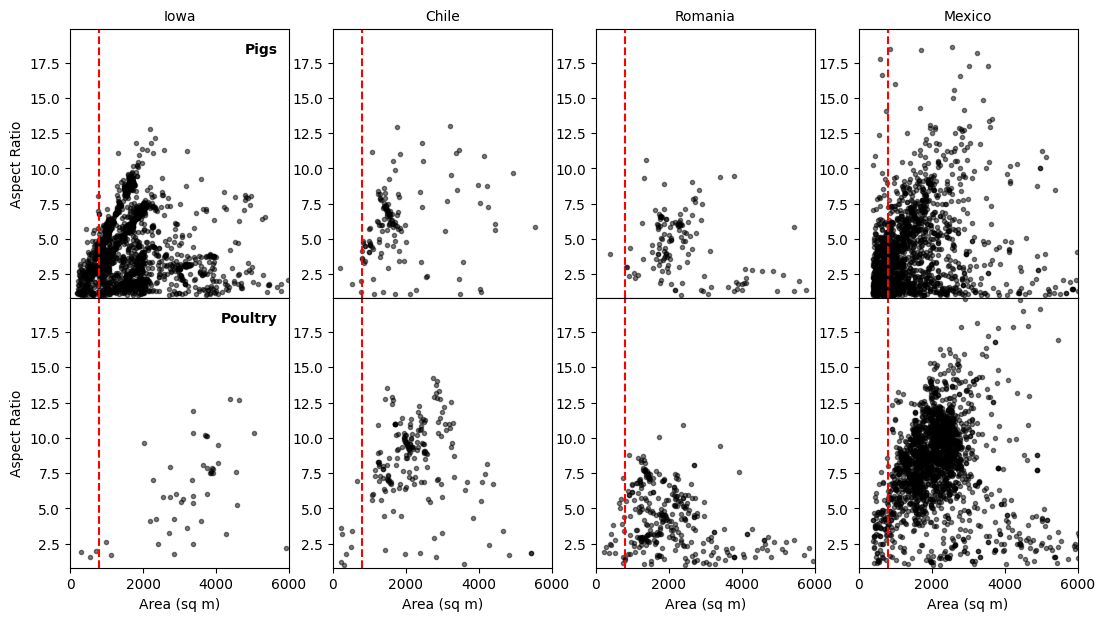

In [6]:
_, (ax0, ax1) = plt.subplots(2, 4, figsize=(13, 7))

def make_the_plot(df, label):
  ax.plot(df["Area (sq m)"], df["Aspect ratio"], 'ko', ms=3, alpha=0.5)
  ax.axvline(threshold, ls='--', color='r')
  ax.set_xlim(0, bins["Area (sq m)"][-1])
  ax.set_ylim(0.8, bins["Aspect ratio"][-1]-0.1)
  if df["Dataset name"].unique() == "Iowa":
    ax.text(0.95, 0.95, label, ha='right', va='top', transform=ax.transAxes,\
            fontsize=10, weight='bold')
    ax.set_ylabel("Aspect Ratio")

# Pigs
for dataset, ax in zip(datasets, ax0):
  to_plot = df[(df["Dataset name"] == dataset) & (df["Farm type"] == "Pig")]
  make_the_plot(to_plot, "Pigs")
  ax.get_xaxis().set_ticks([])
  ax.set_title(dataset, fontsize=10)

# Poultry
for dataset, ax in zip(datasets, ax1):
  to_plot = df[(df["Dataset name"] == dataset) & (df["Farm type"].isin(["Poultry", "Broiler", "Layer"]))]
  make_the_plot(to_plot, "Poultry")
  ax.set_xlabel("Area (sq m)")

plt.subplots_adjust(hspace=0, wspace=0.2)
plt.savefig("/content/drive/MyDrive/CAFO_data/Analysis/compare_aspect_area.png", dpi=450)

In [8]:
for dataset in datasets:
  if dataset == "Iowa":
    # Shouldn't filter Iowa Large CAFOs
    filtered = df[(df["Dataset name"] == dataset)]
  else:
    filtered = df[(df["Dataset name"] == dataset) & (df["Area (sq m)"] >= threshold)]
  print(f"Saving {len(filtered)} buildings (farm + not-farm) for {dataset}")
  filtered.to_pickle(f"{data_path}{dataset}_bldgs_filtered.pkl")

Saving 3206 buildings (farm + not-farm) for Iowa
Saving 978 buildings (farm + not-farm) for Chile
Saving 458 buildings (farm + not-farm) for Romania
Saving 6857 buildings (farm + not-farm) for Mexico
